# 1. Objectif du nettoyage

L'objectif de cette étape est des transformer les données brutes en données exploitables pour l'analyse, sans en modifier le sens ou la granularité.

Le nettoyage vise à :
- standardiser les noms de colonnes pour faciliter leur manipulation en Python/SQL
- identifier et formater la dimension temporelle
- filtrer un périmètre cohérent (géographique et périodique)
- sélectionner les variables utiles pour l'analyse
- préparer une table propre et stable pour les étapes suivantes

# 2. Chargement des données

In [109]:
import pandas as pd

df_raw_dares = pd.read_csv(
    "../data/raw/france_travail/dares_defm_stock_france_brut_trim.csv",
    sep=";"
)

In [110]:
df_raw_dares.shape

(78838, 14)

In [111]:
df_raw_dares.columns.tolist()

['Date',
 'Champ',
 'Type de données',
 'Catégorie',
 'Sexe',
 "Tranche d'âge",
 "Tranche d'heures travaillées",
 'Ancienneté',
 'Formation',
 'Formation (ancienne mesure)',
 'Métier recherché',
 'Indemnisabilité',
 'Qualification',
 "Nombre de demandeurs d'emploi"]

In [96]:
df_raw_dares.head(3)

,Date,Champ,Type de données,Catégorie,Sexe,Tranche d'âge,Tranche d'heures travaillées,Ancienneté,Formation,Formation (ancienne mesure),Métier recherché,Indemnisabilité,Qualification,Nombre de demandeurs d'emploi
0,1996-T1,France métropolitaine,Brutes,C,Total,Total,Total,Total,Total,Total,Total,Total,Total,324100
1,1996-T1,France métropolitaine,Brutes,C,Hommes,Total,Total,Total,Total,Total,Total,Total,Total,148800
2,1996-T1,France métropolitaine,Brutes,D,Total,Total,Total,Total,Total,Total,Total,Total,Total,181500


In [112]:
df_dares = df_raw_dares.copy()

# 3. Standardisation des colonnes

In [113]:
df_dares.columns = df_dares.columns.str.lower()

In [114]:
df_dares.columns = df_dares.columns.str.replace("'","_").str.replace("â","a").str.replace("é","e").str.replace(" ","_")

In [115]:
df_dares.columns

Index(['date', 'champ', 'type_de_donnees', 'categorie', 'sexe',
       'tranche_d_age', 'tranche_d_heures_travaillees', 'anciennete',
       'formation', 'formation_(ancienne_mesure)', 'metier_recherche',
       'indemnisabilite', 'qualification', 'nombre_de_demandeurs_d_emploi'],
      dtype='object')

# 4. Gestion des dates

In [117]:
df_dares["date"].head(10)

0    1996-T1
1    1996-T1
2    1996-T1
3    1996-T1
4    1996-T1
5    1996-T1
6    1996-T1
7    1996-T1
8    1996-T1
9    1996-T1
Name: date, dtype: object

In [119]:
df_dares["date"].str.split("-", expand=True).head(10)

,0,1
0,1996,T1
1,1996,T1
2,1996,T1
3,1996,T1
4,1996,T1
5,1996,T1
6,1996,T1
7,1996,T1
8,1996,T1
9,1996,T1


In [121]:
df_dares["annee"] = df_dares["date"].str.split("-", expand=True)[0]
df_dares["trimestre"] = df_dares["date"].str.split("-", expand=True)[1]

In [126]:
df_dares["trimestre_num"] = df_dares["trimestre"].str.replace("T", "")

In [127]:
df_dares[["date", "annee", "trimestre", "trimestre_num"]].head(10)

,date,annee,trimestre,trimestre_num
0,1996-T1,1996,T1,1
1,1996-T1,1996,T1,1
2,1996-T1,1996,T1,1
3,1996-T1,1996,T1,1
4,1996-T1,1996,T1,1
5,1996-T1,1996,T1,1
6,1996-T1,1996,T1,1
7,1996-T1,1996,T1,1
8,1996-T1,1996,T1,1
9,1996-T1,1996,T1,1


In [129]:
df_dares["periode"] = pd.to_datetime(
    df_dares["annee"] + "-" + ((df_dares["trimestre_num"].astype(int) - 1) * 3 + 1).astype(str) + "-01"
)

In [131]:
df_dares[["date", "annee", "trimestre", "periode"]]

,date,annee,trimestre,periode
0,1996-T1,1996,T1,1996-01-01
1,1996-T1,1996,T1,1996-01-01
2,1996-T1,1996,T1,1996-01-01
3,1996-T1,1996,T1,1996-01-01
4,1996-T1,1996,T1,1996-01-01
...,...,...,...,...
78833,2025-T4,2025,T4,2025-10-01
78834,2025-T4,2025,T4,2025-10-01
78835,2025-T4,2025,T4,2025-10-01
78836,2025-T4,2025,T4,2025-10-01


# 5. Filtrage du périmètre

In [133]:
df_dares_simple = df_dares[
    ["periode", "sexe", "nombre_de_demandeurs_d_emploi"]].copy()


In [134]:
df_dares_simple.head()

,periode,sexe,nombre_de_demandeurs_d_emploi
0,1996-01-01,Total,324100
1,1996-01-01,Hommes,148800
2,1996-01-01,Total,181500
3,1996-01-01,Total,202200
4,1996-01-01,Hommes,315600


In [137]:
df_dares_agg = (
    df_dares_simple
    .groupby(["periode", "sexe"], as_index=False)
    ["nombre_de_demandeurs_d_emploi"]
    .sum()
)

In [138]:
df_dares_agg.head(10)

,periode,sexe,nombre_de_demandeurs_d_emploi
0,1996-01-01,Femmes,31622000
1,1996-01-01,Hommes,28211800
2,1996-01-01,Total,85173749
3,1996-04-01,Femmes,30258600
4,1996-04-01,Hommes,26365400
5,1996-04-01,Total,81263607
6,1996-07-01,Femmes,32052200
7,1996-07-01,Hommes,27445900
8,1996-07-01,Total,84678601
9,1996-10-01,Femmes,32904800


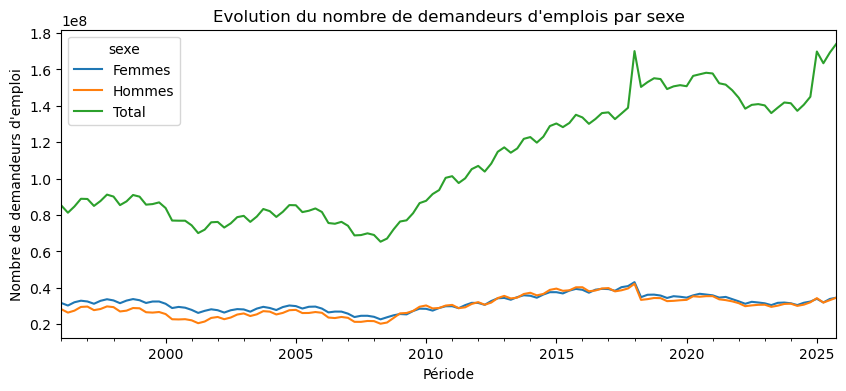

In [141]:
import matplotlib.pyplot as plt

df_dares_agg.pivot(
    index="periode",
    columns="sexe",
    values="nombre_de_demandeurs_d_emploi"
).plot(figsize=(10, 4))

plt.title("Evolution du nombre de demandeurs d'emplois par sexe")
plt.xlabel("Période")
plt.ylabel("Nombre de demandeurs d'emploi")
plt.show()

In [142]:
df_dares_simple = df_dares_simple[df_dares_simple["sexe"] != "Total"]

In [145]:
df_dares_agg = (
    df_dares_simple
    .groupby(["periode", "sexe"], as_index=False)
    ["nombre_de_demandeurs_d_emploi"]
    .sum()
)

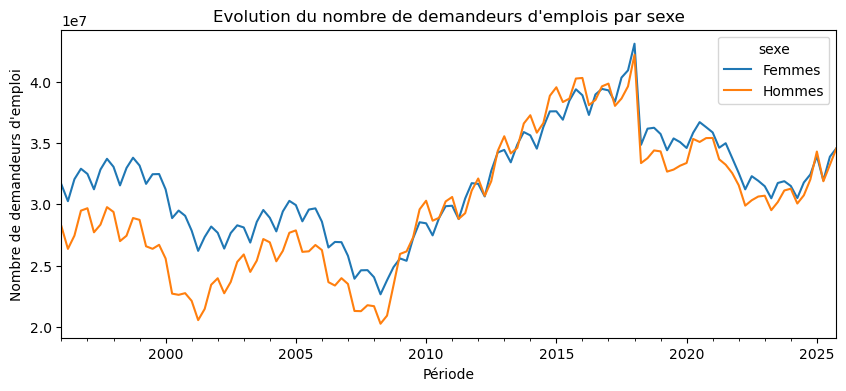

In [146]:
import matplotlib.pyplot as plt

df_dares_agg.pivot(
    index="periode",
    columns="sexe",
    values="nombre_de_demandeurs_d_emploi"
).plot(figsize=(10, 4))

plt.title("Evolution du nombre de demandeurs d'emplois par sexe")
plt.xlabel("Période")
plt.ylabel("Nombre de demandeurs d'emploi")
plt.show()

In [147]:
df_dares_simple_no_total = df_dares_simple[df_dares_simple["sexe"] != "Total"]

In [148]:
df_dares_simple_no_total["sexe"].unique()

array(['Hommes', 'Femmes'], dtype=object)

In [149]:
df_dares_agg_no_total = (
    df_dares_simple_no_total
    .groupby(["periode", "sexe"], as_index=False)
    ["nombre_de_demandeurs_d_emploi"]
    .sum()
)

In [150]:
df_dares_agg_no_total.head(10)

,periode,sexe,nombre_de_demandeurs_d_emploi
0,1996-01-01,Femmes,31622000
1,1996-01-01,Hommes,28211800
2,1996-04-01,Femmes,30258600
3,1996-04-01,Hommes,26365400
4,1996-07-01,Femmes,32052200
5,1996-07-01,Hommes,27445900
6,1996-10-01,Femmes,32904800
7,1996-10-01,Hommes,29485200
8,1997-01-01,Femmes,32481800
9,1997-01-01,Hommes,29681100


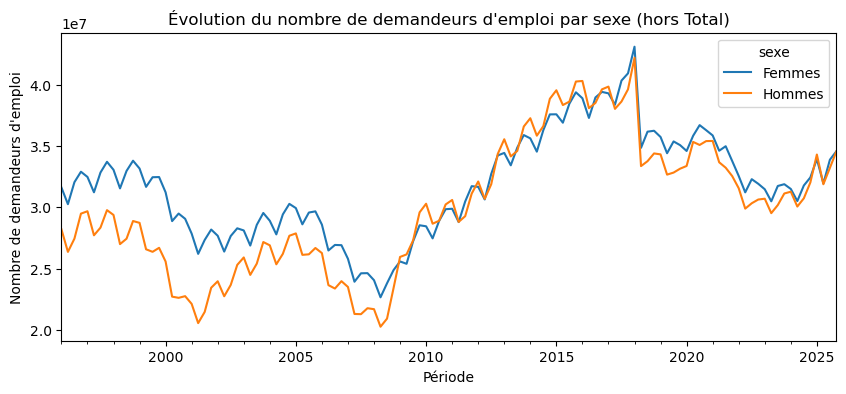

In [151]:
import matplotlib.pyplot as plt

df_dares_agg_no_total.pivot(
    index="periode",
    columns="sexe",
    values="nombre_de_demandeurs_d_emploi"
).plot(figsize=(10, 4))

plt.title("Évolution du nombre de demandeurs d'emploi par sexe (hors Total)")
plt.xlabel("Période")
plt.ylabel("Nombre de demandeurs d'emploi")
plt.show()

### Analyse — Évolution du nombre de demandeurs d'emploi par sexe

Le graphique montre l’évolution du nombre de demandeurs d’emploi depuis 1996,
séparément pour les femmes et les hommes.

On observe :
- une baisse globale à la fin des années 1990 et au début des années 2000,
- une hausse marquée à partir de la crise de 2008,
- une rupture nette autour de 2020,
- une tendance récente à la baisse, avec des niveaux qui restent élevés.

Les évolutions sont très proches entre les femmes et les hommes sur l’ensemble de la période.

In [152]:
df_dares_final = df_dares_agg_no_total.copy()

In [153]:
df_dares_final.head()

,periode,sexe,nombre_de_demandeurs_d_emploi
0,1996-01-01,Femmes,31622000
1,1996-01-01,Hommes,28211800
2,1996-04-01,Femmes,30258600
3,1996-04-01,Hommes,26365400
4,1996-07-01,Femmes,32052200


In [155]:
df_dares_final.groupby("sexe")["nombre_de_demandeurs_d_emploi"].max()

sexe
Femmes    43105300
Hommes    42204600
Name: nombre_de_demandeurs_d_emploi, dtype: int64

In [156]:
df_dares_final.loc[
    df_dares_final.groupby("sexe")["nombre_de_demandeurs_d_emploi"].idxmax()
][["sexe", "periode", "nombre_de_demandeurs_d_emploi"]]

,sexe,periode,nombre_de_demandeurs_d_emploi
176,Femmes,2018-01-01,43105300
177,Hommes,2018-01-01,42204600


### Pic du nombre de demandeurs d'emploi

Le nombre maximal de demandeurs d’emploi est observé au premier trimestre 2018,
pour les femmes comme pour les hommes.

Sur ce trimestre, le volume agrégé est légèrement plus élevé chez les femmes
(≈ 43,1 millions) que chez les hommes (≈ 42,2 millions).